In [1]:
import tensorflow_hub as hub
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import cv2

#from google.colab import drive 
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
content_image = cv2.imread('https://www.dropbox.com/s/snctm17iklrg5sk/art.png?dl=1')
style_image   = cv2.imread('https://www.dropbox.com/s/2c8c63cl0ym9cgd/starrynight.png?dl=1')

print(content_image.shape)
print(style_image.shape)

(511, 640, 3)
(200, 252, 3)


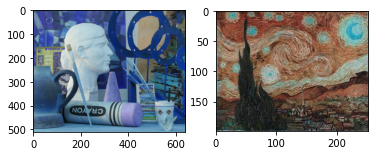

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(content_image)

plt.subplot(1, 2, 2)
plt.imshow(style_image)

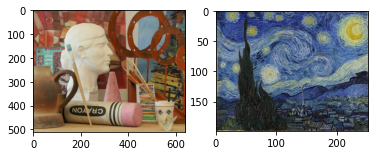

In [5]:
content_image = cv2.cvtColor(content_image, cv2.COLOR_BGR2RGB)
style_image   = cv2.cvtColor(style_image, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(content_image)

plt.subplot(1, 2, 2)
plt.imshow(style_image)

In [6]:
content_image = tf.expand_dims(content_image, axis=0)
style_image   = tf.expand_dims(style_image, axis=0)

content_image = tf.dtypes.cast(content_image, tf.float32)
style_image   = tf.dtypes.cast(style_image, tf.float32)

print(content_image.shape)
print(style_image.shape)

(1, 511, 640, 3)
(1, 200, 252, 3)


(1, 512, 640, 3)


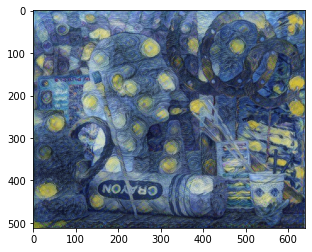

In [7]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


stylized_image = model(content_image/255.0, style_image/255.0)[0]

print(stylized_image.shape)
plt.imshow(stylized_image[0])